In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

data = pd.read_csv('data.csv')
print(data)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


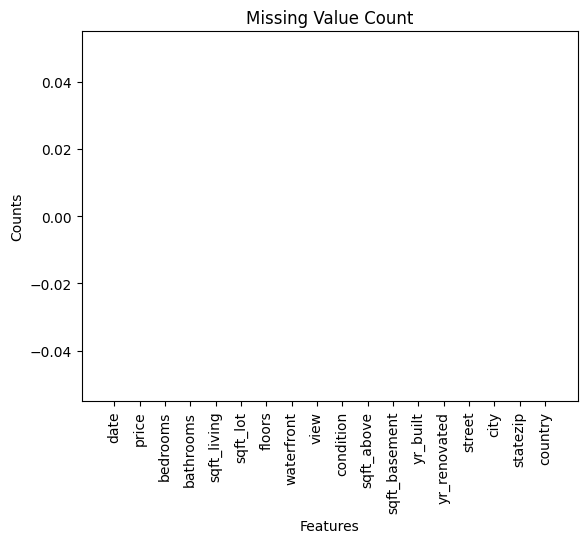

In [3]:
missing = data.isnull().sum()

print(missing)

plt.bar(missing.index,missing.values)
plt.title('Missing Value Count')
plt.xlabel('Features')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


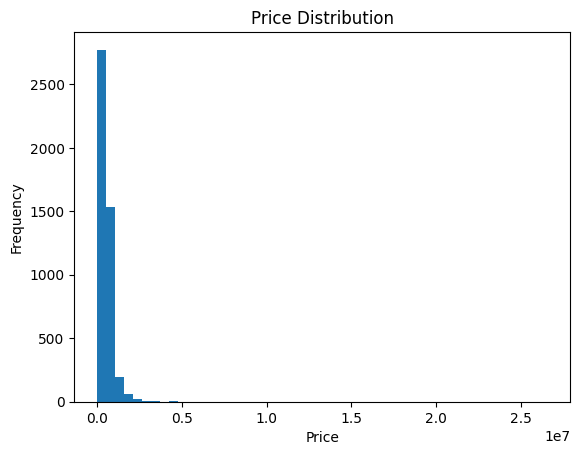

In [5]:
plt.hist(data.price,bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [6]:
Y = data.price
X = data.drop('price',axis=1)
X = X.drop('date',axis=1)
X = X.drop('street',axis=1)
X = X.drop('city',axis=1)
X = X.drop('country',axis=1)
X = X.drop('statezip',axis=1)

Y = Y.to_frame() #2D
print(X)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

print(X_test_scaler)

[[ 0.67107637 -0.21164956 -0.30370109 ... -0.01013762  0.22822381
   1.22163827]
 [-0.43635011  0.42781708 -0.35585502 ... -0.67693881  1.34479376
  -0.82243657]
 [ 0.67107637  0.42781708  1.05230095 ... -0.67693881 -0.17780163
  -0.82243657]
 ...
 [-1.54377658 -0.53138288 -0.65834778 ... -0.67693881  1.1756165
  -0.82243657]
 [-0.43635011  0.10808376 -0.0220699  ...  0.18344982  0.26205926
   1.2359468 ]
 [-0.43635011 -1.49058283 -0.49145522 ...  0.39854698 -1.09135886
   1.21039586]]


In [9]:

mymodels = {'LR':LinearRegression() , 'RF':RandomForestRegressor() , 
            'DT' : DecisionTreeRegressor(),'KNN':KNeighborsRegressor()}
result = []

for model_name , model in mymodels.items():
    model.fit(X_train_scaler,Y_train)
    Y_pred = model.predict(X_test_scaler)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse = mse**0.5
    ase = mean_absolute_error(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    d = { 'name' : model_name , 'MSE':mse,'RMSE':rmse,'ASE':ase,'r2_score':r2}
    result.append(d)

metrics_df = pd.DataFrame(result)
metrics_df.sort_values(by='RMSE')
metrics_df

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,name,MSE,RMSE,ASE,r2_score
0,LR,6.796678e+10,260704.400319,163781.359071,0.500535
1,RF,7.361856e+10,271327.412552,163661.262303,0.459002
2,DT,1.432873e+11,378533.097665,227103.134810,-0.052970
3,KNN,1.103920e+11,332252.926625,178934.165374,0.188767


In [10]:
best_model = metrics_df.iloc[0]
print(best_model)

name                        LR
MSE         67966784345.595535
RMSE             260704.400319
ASE              163781.359071
r2_score              0.500535
Name: 0, dtype: object
